In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Setup Complete.")

/kaggle/input/finaldataset/final_dataset.csv
/kaggle/input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv
/kaggle/input/setdata/new5_data (2).csv
Setup Complete.


In [2]:
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import datetime
import warnings
warnings.filterwarnings("ignore")
print("Library Setup Complete.")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Library Setup Complete.


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# Reading Data
vaccine_filepath = '../input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv'
vaccine_data = pd.read_csv(vaccine_filepath)
print("Read Complete.")

Read Complete.


In [4]:
# Examining Data
vaccine_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
# Examining Data
vaccine_data.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False
228206,1460155671140134912,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False


In [6]:
# Determining size
vaccine_data.shape

(228207, 16)

In [7]:
# Examining statistics
vaccine_data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [8]:
# Determining data types
vaccine_data.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [9]:
# Looking for unfilled values
vaccine_data.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [10]:
# Lowercase
vaccine_data['text'] = vaccine_data['text'].str.lower()
vaccine_data['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [11]:
# URL Removal
vaccine_data['text'] = vaccine_data['text'].apply(lambda x:re.sub(r"http\S+", "", x))
vaccine_data["text"]

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [12]:
# Punctuation Removal
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
vaccine_data["text"] = vaccine_data["text"].apply(lambda text: remove_punctuation(text))
vaccine_data["text"]

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we need a vaccine bori...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 228207, dtype: object

In [13]:
# Single character and double space removal
vaccine_data["text"] = vaccine_data["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
vaccine_data["text"] = vaccine_data["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
vaccine_data["text"]

0         same folks said daikon paste could treatcytoki...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we needvaccine borisjo...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 228207, dtype: object

In [14]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

vaccine_data["text"] = vaccine_data["text"].apply(lambda text: remove_stopwords(text))
vaccine_data["text"]

0         folks said daikon paste could treatcytokine st...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts immutable senator even youre ethically s...
4         explain needvaccine borisjohnson matthancock w...
                                ...                        
228202    45 urban bengaluru covidvaccine availability 1...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    promote vaccines leaving stronger russia vacci...
228206    45 urban bengaluru covidvaccine availability 1...
Name: text, Length: 228207, dtype: object

In [15]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
vaccine_data["text"] = vaccine_data["text"].apply(str)
vaccine_data["text"] = vaccine_data["text"].apply(remove_emoji)
vaccine_data["text"]

0         folks said daikon paste could treatcytokine st...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts immutable senator even youre ethically s...
4         explain needvaccine borisjohnson matthancock w...
                                ...                        
228202    45 urban bengaluru covidvaccine availability 1...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    promote vaccines leaving stronger russia vacci...
228206    45 urban bengaluru covidvaccine availability 1...
Name: text, Length: 228207, dtype: object

In [16]:
# Single character and double space removal
vaccine_data["text"] = vaccine_data["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
vaccine_data["text"] = vaccine_data["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
vaccine_data["text"]

0         folks said daikon paste could treatcytokine st...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts immutable senator even youre ethically s...
4         explain needvaccine borisjohnson matthancock w...
                                ...                        
228202    45 urban bengaluru covidvaccine availability 1...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    promote vaccines leaving stronger russia vacci...
228206    45 urban bengaluru covidvaccine availability 1...
Name: text, Length: 228207, dtype: object

In [17]:
# Most common words
from collections import Counter
cnt = Counter()
for text in vaccine_data["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('covaxin', 73556),
 ('vaccine', 51471),
 ('moderna', 47038),
 ('slots', 35471),
 ('dose', 30641),
 ('covid19', 29782),
 ('age', 25404),
 ('18', 21765),
 ('pfizer', 14366),
 ('bbmp', 14206)]

In [18]:
# Sentiment analysis
sid = SIA()
vaccine_data['sentiments'] = vaccine_data["text"].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',str(x).lower()))))
vaccine_data['Positive Sentiment'] = vaccine_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
vaccine_data['Neutral Sentiment'] = vaccine_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
vaccine_data['Negative Sentiment'] = vaccine_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
vaccine_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,folks said daikon paste could treatcytokine st...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,Twitter Web App,1,1,False,"{'neg': 0.209, 'neu': 0.608, 'pos': 0.182, 'co...",0.182001,0.608001,0.209001
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.154001,0.846001,0.000001
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain needvaccine borisjohnson matthancock w...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001


In [19]:
#Number of Words
vaccine_data['Number_Of_Words'] = vaccine_data['text'].apply(lambda x:len(x.split(' ')))
#Average Word Length
vaccine_data['Mean_Word_Length'] = vaccine_data['text'].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
vaccine_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,8,7.12
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,Twitter Web App,1,1,False,"{'neg': 0.209, 'neu': 0.608, 'pos': 0.182, 'co...",0.182001,0.608001,0.209001,11,5.91
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.154001,0.846001,0.000001,12,7.58
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,12,5.75
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,6,13.33


In [20]:
# Tokenization and lemmatization
def tokenization(text):
    text = re.split('\W+', text)
    return text
vaccine_data['tokenized'] = vaccine_data['text'].apply(lambda x: tokenization(x.lower()))
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
vaccine_data['lemmatized'] = vaccine_data['tokenized'].apply(lambda x: lemmatizer(x))
vaccine_data.head()
vaccine_data.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,favorites,is_retweet,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length,tokenized,lemmatized
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,...,0,False,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.216001,0.784001,0.000001,14,6.07,"[45, urban, bengaluru, covidvaccine, availabil...","[45, urban, bengaluru, covidvaccine, availabil..."
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,...,1,False,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.231001,0.769001,0.000001,12,7.08,"[1844, bbmp, bengaluru, covidvaccine, availabi...","[1844, bbmp, bengaluru, covidvaccine, availabi..."
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,...,0,False,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.216001,0.784001,0.000001,14,6.14,"[1844, urban, bengaluru, covidvaccine, availab...","[1844, urban, bengaluru, covidvaccine, availab..."
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,...,0,False,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...",0.510001,0.490001,0.000001,7,7.29,"[promote, vaccines, leaving, stronger, russia,...","[promote, vaccine, leaving, stronger, russia, ..."
228206,1460155671140134912,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:00:15,...,0,False,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.216001,0.784001,0.000001,14,6.07,"[45, urban, bengaluru, covidvaccine, availabil...","[45, urban, bengaluru, covidvaccine, availabil..."


(-0.5, 399.5, 199.5, -0.5)

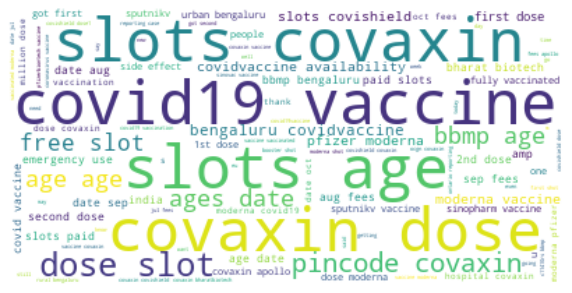

In [21]:
# World Cloud
tweet_All = " ".join(review for review in vaccine_data["text"])

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

0.04476185308513761
0.10550731225159615
0.8497047075988028


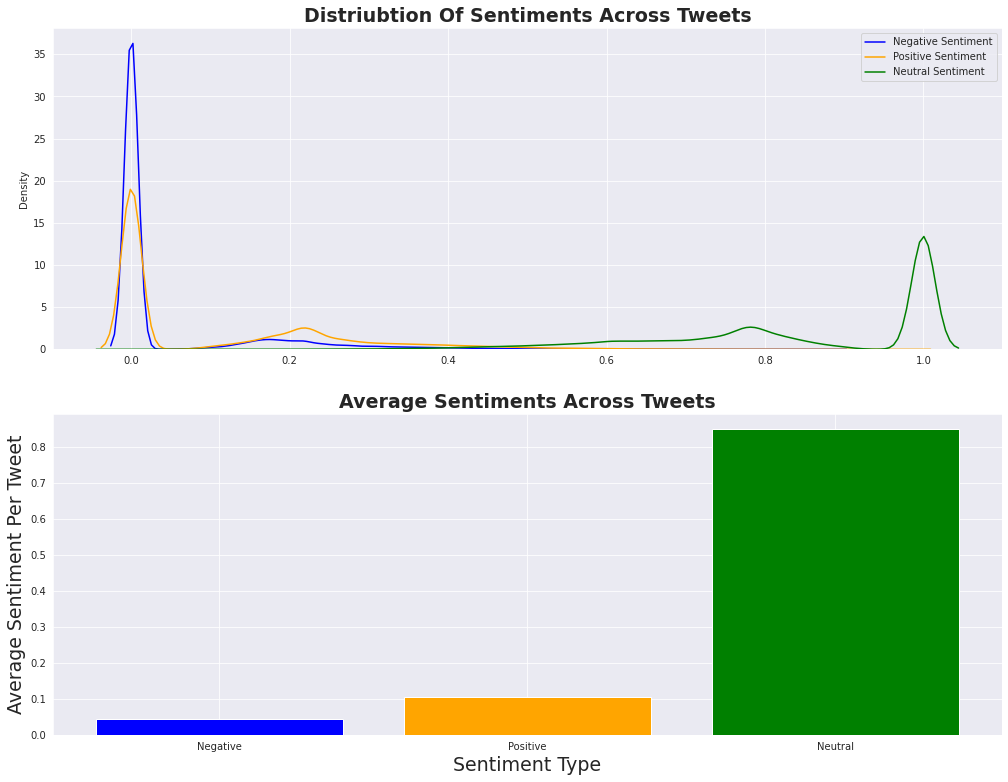

In [22]:
# Sentiment Distribution
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(vaccine_data['Negative Sentiment'], color = 'blue')
sns.kdeplot(vaccine_data['Positive Sentiment'], color = 'orange')
sns.kdeplot(vaccine_data['Neutral Sentiment'], color = 'green')
plt.xlabel(' ')
plt.legend(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.subplot(2,1,2)
plt.title('Average Sentiments Across Tweets',fontsize=19,fontweight='bold')
neg_total_avg = (vaccine_data['Negative Sentiment'].sum())/len(vaccine_data.index)
print(neg_total_avg)
pos_total_avg = (vaccine_data['Positive Sentiment'].sum())/len(vaccine_data.index)
print(pos_total_avg)
neu_total_avg = (vaccine_data['Neutral Sentiment'].sum())/len(vaccine_data.index)
print(neu_total_avg)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]
plt.bar(sentiment_type, sentiment_total_avg, color = ['blue', 'orange', 'green'])
plt.ylabel('Average Sentiment Per Tweet',fontsize=19)
plt.xlabel('Sentiment Type',fontsize=19)
plt.show()

In [23]:
# 50 most common words
all_words=[]
for i in range(len(vaccine_data['lemmatized'])):
    a=vaccine_data['lemmatized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:50].rename_axis('Common Words').reset_index(name='count')

fig = ex.treemap(common_words, path=['Common Words'], values='count',title='50 Most Common Words In Tweets')
fig.show()

In [24]:
# Change variables
ft_data = vaccine_data.copy()
ft_data['date'] = pd.to_datetime(vaccine_data['date']).dt.date
ft_data['year'] = pd.DatetimeIndex(ft_data['date']).year
b_date_count = ft_data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


# ###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')

fig.add_annotation(x=datetime.datetime(2021,3,1), y=b_date_count_dt.loc[pd.Timestamp('2021-03-1'),'year'],
            text=r"J&J authorization",
            showarrow=True,
            arrowhead= 3,
            bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,4,21), y=b_date_count_dt.loc[pd.Timestamp('2021-04-21'),'year'],
            text=r"Fear of supply outstripping demand & CDC discussion of J&J bloodclots",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,6,29), y=b_date_count_dt.loc[pd.Timestamp('2021-06-29'),'year'],
            text=r"Discussion of vaccine protection against delta variant",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.update_layout(title='<b>Daily Tweets<b>',width=1000)
fig.show()

In [25]:
# Assigning sentiment 
Positive_tweet = vaccine_data[vaccine_data['Positive Sentiment'] >= 0.5].reset_index()
Negative_tweet = vaccine_data[vaccine_data['Negative Sentiment']>= 0.5].reset_index()
Neutral_tweet = vaccine_data[vaccine_data['Neutral Sentiment']>= 0.5].reset_index()

In [26]:
# 50 most common positive words

all_positive_words=[]
for i in range(len(Positive_tweet['lemmatized'])):
    a=Positive_tweet['lemmatized'][i]
    for i in a:
        all_positive_words.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts()[:50].rename_axis('Common Positive Words').reset_index(name='count')
fig = ex.treemap(common_words, path=['Common Positive Words'], values='count',title='50 Most Common Words In Positive Tweets')
fig.show()


In [27]:
# 50 most common negative words

all_negative_words=[]
for i in range(len(Negative_tweet['lemmatized'])):
    a=Negative_tweet['lemmatized'][i]
    for i in a:
        all_negative_words.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts()[:50].rename_axis('Common Negative Words').reset_index(name='count')
fig = ex.treemap(common_words, path=['Common Negative Words'], values='count',title='50 Most Common Words In Negative Tweets')
fig.show()

In [28]:
import numpy as np
import pandas as pd

In [29]:
data = '../input/setdata/new5_data (2).csv'

df = pd.read_csv(data, header=None)

In [30]:
#load csv file
Train = pd.read_csv('../input/setdata/new5_data (2).csv')
data=Train
data.head()


,No.,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Positive,Negative,Neutral,Compound,Sentiment
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,0.148,0.000,0.852,0.5106,1
1,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,0.202,0.000,0.798,0.5859,1
2,8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091,20986,128119,False,18-08-2020 12:15,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,0.098,0.195,0.707,-0.3532,-1
3,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,0.000,0.000,1.000,0.0000,0
4,11,Mohammadali Naseri,TEHRAN,MSc in Numerical Analysis from the Kharazmi Un...,02-02-2018 17:20,4,88,90,False,18-08-2020 11:04,it’s over?!\n\n#Covid19Millionares #covid19 \n...,"['Covid19Millionares', 'covid19', 'corona', 'C...",Twitter for iPhone,False,0.000,0.000,1.000,0.0000,0


In [31]:
data['Sentiment'].value_counts()

 1    112009
 0     82320
-1     49696
Name: Sentiment, dtype: int64

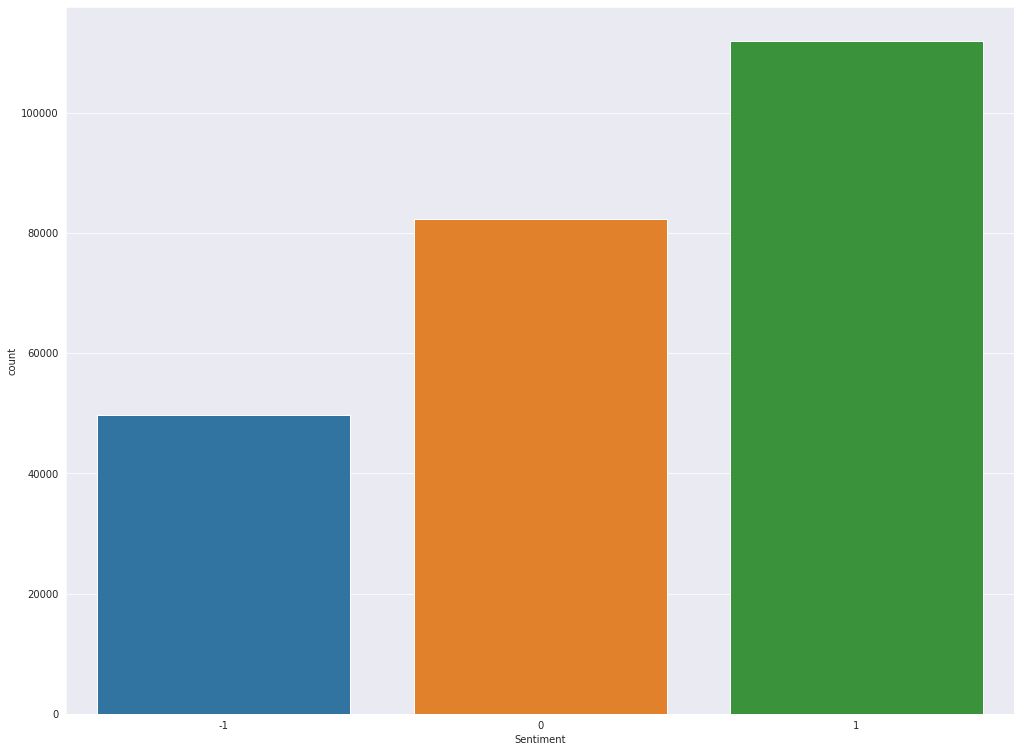

In [32]:
import seaborn as sns
ax=sns.countplot(data.Sentiment)

In [33]:
data.head()

,No.,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Positive,Negative,Neutral,Compound,Sentiment
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,0.148,0.000,0.852,0.5106,1
1,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,0.202,0.000,0.798,0.5859,1
2,8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091,20986,128119,False,18-08-2020 12:15,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,0.098,0.195,0.707,-0.3532,-1
3,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,0.000,0.000,1.000,0.0000,0
4,11,Mohammadali Naseri,TEHRAN,MSc in Numerical Analysis from the Kharazmi Un...,02-02-2018 17:20,4,88,90,False,18-08-2020 11:04,it’s over?!\n\n#Covid19Millionares #covid19 \n...,"['Covid19Millionares', 'covid19', 'corona', 'C...",Twitter for iPhone,False,0.000,0.000,1.000,0.0000,0


In [34]:
data.drop(["No.","user_name", "user_location", 
                                "user_description", "user_created", 
                                "user_followers", "user_friends", 
                                "user_favourites", "user_verified","date","hashtags", 
                                "source", "is_retweet" ,"Positive","Negative","Neutral","Compound"],axis=1,inplace=True)
data.head()

,text,Sentiment
0,Australia to Manufacture Covid-19 Vaccine and ...,1
1,"@MSNBC Well, let’s qualify that: would anyone ...",1
2,"Most countries, without the ability to make #V...",-1
3,#DNA zooms up charts in 1st week; hear #vacci...,0
4,it’s over?!\n\n#Covid19Millionares #covid19 \n...,0


In [35]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["text"], 
                                                    data["Sentiment"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (195220,) (195220,)
testing set : (48805,) (48805,)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [37]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(195220, 297738)
(195220, 297738)


In [38]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(48805, 297738)
(48805, 297738)


In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
predictions = model.predict(x_test_tfidf)
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

76.24218830037906

In [41]:
from sklearn.metrics import confusion_matrix,f1_score

from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,predictions)



array([[ 5347,  2548,  2036],
       [  637, 14505,  1333],
       [ 1177,  3864, 17358]])

<AxesSubplot:>

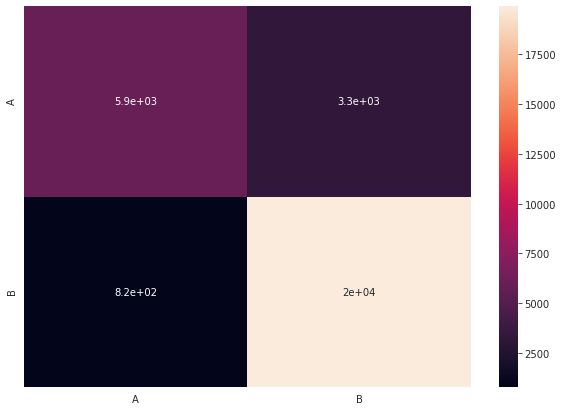

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array=[[ 5949,  3338],[ 815, 19895 ]]
df_cm = pd.DataFrame(array, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [43]:
#f1-score
f1_score(y_test,predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

In [ ]:
print("Classification Report : ")
print(classification_report(y_test,predictions))